<a href="https://colab.research.google.com/github/riyazahmadshaik/computationalmethods-5731/blob/master/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 10/21/2020)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [3]:
# Write your code here

import nltk; nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
pip install pyLDAvis

     |████████████████████████████████| 1.6MB 1.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=470533032a4c2397f5478647fe7773ef27a542934bd26aca994f7b2e745b6e39
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [9]:
pip install spacy==0.101.0

Processing /root/.cache/pip/wheels/d7/4c/69/f69ba72174fc44cd9832d6f08c95f921d21e4113cd66a4d2f3/spacy-0.101.0-cp36-cp36m-linux_x86_64.whl
Processing /root/.cache/pip/wheels/90/af/51/9efd49862c6dcb6439baaa235714fc4de5cecf3e01613b2fef/murmurhash-0.26.4-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/50/33/b309dd14caa82d9bbb38f735ce86a5d9971197787a49eb118aa7bef22827/sputnik-0.9.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a5/0f/d29aa68c55db37844c77e7e96143bd96651fd0f4453c9f6ee043ac846b77/cymem-1.31.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d3/1e/15cdaf6b7e93f1b6d1b008960520ede5efe31f843c45feff31700c625c8f/thinc-5.0.8.tar.gz
Processing /root/.cache/pip/wheels/cc/b9/c5/48707aa9079a866c5c761336035e2570ebceab788d4830f222/preshed-0.46.4-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0b/70/b84f9944a03964a88031ef6ac219b6c91e8ba2f373362329d8770ef36

In [11]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
txt = open("Inclass4.txt").read()
df =txt
df=df.split()
df

['5',
 'Ala.',
 '740',
 'Supreme',
 'Court',
 'of',
 'Alabama.',
 'ADAMS',
 'v.',
 'TANNER',
 'AND',
 'HORTON.',
 'June',
 'Term,',
 '1843.',
 'Synopsis',
 'WRIT',
 'of',
 'Error',
 'to',
 'the',
 'Circuit',
 'Court',
 'of',
 'Sumter.',
 'West',
 'Headnotes',
 '(2)',
 '[1]',
 'Chattel',
 'Mortgages',
 'Crops',
 'A',
 'growing',
 'crop',
 'has',
 'such',
 'an',
 'existence',
 'as',
 'to',
 'be',
 'the',
 'subject-matter',
 'of',
 'a',
 'mortgage',
 'or',
 'other',
 'contract',
 'which',
 'passes',
 'an',
 'interest',
 'to',
 'vest',
 'in',
 'possession,',
 'either',
 'immediately',
 'or',
 'at',
 'a',
 'future',
 'time.',
 '4',
 'Cases',
 'that',
 'cite',
 'this',
 'headnote',
 '[2]',
 'Creditors’',
 'Remedies',
 'Lien',
 'and',
 'Priority',
 'Under',
 'St.1821,',
 'prohibiting',
 'a',
 'levy',
 'on',
 'a',
 'crop',
 'until',
 'it',
 'has',
 'been',
 'gathered,',
 'no',
 'lien',
 'attaches',
 'in',
 'favor',
 'of',
 'a',
 'fi.',
 'fa.',
 'on',
 'a',
 'growing',
 'crop,',
 'nor',
 'does'

In [12]:
df = [re.sub('\S*@\S*\s?', '', sent) for sent in df]

# Remove new line characters
df = [re.sub('\s+', ' ', sent) for sent in df]

# Remove distracting single quotes
df = [re.sub("\'", "", sent) for sent in df]

pprint(df[:1])

['5']


In [13]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(df))

print(data_words[:1])

[[]]


In [14]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

[]


/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [19]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_words_bigrams[:1])

[[]]


In [20]:

# Create Dictionary
id2word = corpora.Dictionary(data_words_bigrams)

# Create Corpus
texts = data_words_bigrams

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[]]


In [21]:
id2word[0]

'ala'

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [34]:
# Write your code here
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles
    
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [36]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [37]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [38]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [39]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [40]:
number_of_topics=7
words=10
document_list,titles=load_data("","Inclass4.txt")
clean_text=preprocess_data(document_list)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

Total Number of Documents: 159
[(0, '-0.432*"execut" + -0.361*"crop" + -0.317*"levi" + -0.211*"lien" + -0.193*"gather" + -0.188*"law" + -0.147*"right" + -0.135*"grow" + -0.126*"claimant" + -0.121*"case"'), (1, '-0.309*"claimant" + -0.297*"harrison" + -0.254*"cotton" + -0.184*"plaintiff" + -0.175*"rep" + 0.166*"law" + -0.159*"contract" + -0.154*"possess" + 0.153*"lien" + -0.135*"time"'), (2, '0.528*"rep" + 0.198*"john" + 0.181*"2" + -0.181*"execut" + -0.177*"cotton" + 0.160*"1" + 0.146*"crop" + 0.139*"sale" + -0.136*"issu" + -0.117*"plaintiff"'), (3, '0.273*"possess" + 0.251*"v" + 0.223*"time" + -0.219*"harrison" + 0.192*"defend" + 0.167*"indors" + 0.166*"claimant" + -0.149*"1" + 0.144*"contract" + 0.138*"might"'), (4, '0.271*"debtor" + 0.237*"sale" + 0.232*"crop" + 0.197*"defend" + 0.153*"statut" + -0.152*"law" + 0.149*"legislatur" + 0.145*"condit" + 0.128*"correct" + 0.128*"secur"'), (5, '0.273*"possess" + -0.154*"v" + 0.152*"absenc" + 0.152*"equiti" + 0.148*"claimant" + 0.140*"consen

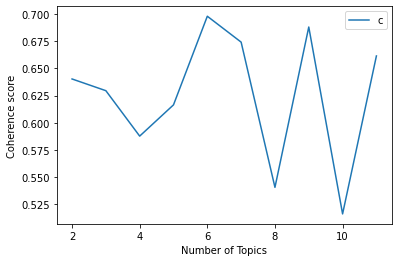

In [41]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)


## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

In [ ]:
 we can clearly see that LDA method gave a highest coherece score of 0.811 , I can say Latent Dirichlet Allocation(LDA) method is the optimum value and also the number of topics are very good.